In [45]:
import pandas as pd

In [46]:
raw_data = pd.read_csv('scout_obleka_zheni.csv')
raw_data

,Name,SKU,Original Price,Discount Price,Description,Image URL,Sizes,Colors,URL
0,1960 Logo T-shirt F83513,1960 Logo T-shirt F83513,"3,090.00ден",NaN,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 'm', 's']","['green', 'orange', 'orange', 'orange']",https://www.scout.mk/product/1960-logo-t-shirt...
1,Abisko Hike Shirt W F87140,Abisko Hike Shirt W F87140,NaN,NaN,Лесна кошула со долги ракави за пешачење и пат...,https://www.scout.mk/wp-content/uploads/2024/0...,"['m', 's']","['blue', 'blue']",https://www.scout.mk/product/abisko-hike-shirt...
2,Abisko Lite Fleece Jacket F87142,Abisko Lite Fleece Jacket F87142,"9,290.00ден",NaN,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'l', 'm', 'm']","['green', 'green', 'navy', 'navy']",https://www.scout.mk/product/abisko-lite-fleec...
3,Abisko Lite Trekking Jacket F86131,Abisko Lite Trekking Jacket F86131,NaN,NaN,Лесна и дишлива јакна за пешачење во топли усл...,https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 's']","['red', 'red', 'red']",https://www.scout.mk/product/abisko-lite-trekk...
4,Abisko Midsummer Jacket F89826,Abisko Midsummer Jacket F89826,"14,290.00ден",NaN,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 's', 's']","['green', 'green', 'navy', 'navy']",https://www.scout.mk/product/abisko-midsummer-...
...,...,...,...,...,...,...,...,...,...
206,WOMENS BIRCHDALE,WOMENS BIRCHDALE,"7,390.00ден",NaN,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,"['10', '12', '12', '14', '16']","['blue', 'blue', 'blue', 'blue', 'turquoise']",https://www.scout.mk/product/womens-birchdale/
207,Womens Hepley W RWA512,Womens Hepley W RWA512,NaN,NaN,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,[],[],https://www.scout.mk/product/womens-hepley-w-r...
208,WOMENS MONTES,WOMENS MONTES,"1,990.00ден",NaN,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,"['10', '10', '12', '12', '12', '14', '14', '14...","['blue', 'blue', 'blue', 'bordeaux', 'bordeaux...",https://www.scout.mk/product/womens-montes/
209,WOMENS WENTWOOD IX,WomensWentwoodIX W RWP393,"12,290.00ден",NaN,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,"['10', '12']","['navy', 'navy']",https://www.scout.mk/product/womenswentwoodix-...


In [47]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     40
Discount Price    146
Description         2
Image URL           0
Sizes               0
Colors              0
URL                 0
dtype: int64

In [48]:
# Drop any row that’s missing either price
# df_drop = raw_data.dropna(subset=['Original Price','Discount Price'])

In [49]:

def clean_price(col):
    return (
        col
        .str.replace(r'[^\d.,]', '', regex=True)   # remove non-digits except dot/comma
        .str.replace(',', '', regex=False)         # remove thousands separator
        .astype(float)
    )

# 2.2 Apply it
raw_data['orig_price'] = clean_price(raw_data['Original Price'])
raw_data['discount_price'] = clean_price(raw_data['Discount Price'])

# 2.3 (Optional) flag “has_discount”
raw_data['has_discount'] = raw_data['discount_price'].notna()


In [50]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     40
Discount Price    146
Description         2
Image URL           0
Sizes               0
Colors              0
URL                 0
orig_price         40
discount_price    146
has_discount        0
dtype: int64

In [51]:
raw_data['discount_price'] = raw_data['discount_price'].fillna(raw_data['orig_price'])

In [52]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price     40
Discount Price    146
Description         2
Image URL           0
Sizes               0
Colors              0
URL                 0
orig_price         40
discount_price     40
has_discount        0
dtype: int64

In [53]:
raw_data = raw_data.dropna(subset=['orig_price'])

In [54]:
raw_data.isnull().sum()

Name                0
SKU                 0
Original Price      0
Discount Price    106
Description         1
Image URL           0
Sizes               0
Colors              0
URL                 0
orig_price          0
discount_price      0
has_discount        0
dtype: int64

In [55]:
# completely drop the un-needed original price columns
raw_data = raw_data.drop(columns=['Discount Price'])

In [56]:
raw_data.isnull().sum()

Name              0
SKU               0
Original Price    0
Description       1
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [57]:
raw_data = raw_data.drop(columns=['Original Price'])

In [58]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       1
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [59]:
raw_data = raw_data.dropna(subset=['Description'])

In [60]:
raw_data.isnull().sum()

Name              0
SKU               0
Description       0
Image URL         0
Sizes             0
Colors            0
URL               0
orig_price        0
discount_price    0
has_discount      0
dtype: int64

In [61]:
import ast

# 4.1 Convert the string-literal to real Python list
raw_data['sizes_list'] = raw_data['Sizes'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

raw_data['colors_list'] = raw_data['Colors'] \
    .apply(lambda s: ast.literal_eval(s) if pd.notna(s) else [])

# 4.2 Remove duplicates within each list
raw_data['sizes_list'] = raw_data['sizes_list'].apply(lambda L: sorted(set(L)))
raw_data['colors_list'] = raw_data['colors_list'].apply(lambda L: sorted(set(L)))


In [62]:
# 7.2 Trim whitespace & normalize case
for col in ['Name', 'SKU', 'Description']:
    raw_data[col] = raw_data[col].str.strip()

In [63]:
raw_data.drop('SKU', axis=1, inplace=True)

In [64]:
raw_data.head(1)

,Name,Description,Image URL,Sizes,Colors,URL,orig_price,discount_price,has_discount,sizes_list,colors_list
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,"['l', 'm', 'm', 's']","['green', 'orange', 'orange', 'orange']",https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,False,"[l, m, s]","[green, orange]"


In [65]:
raw_data.drop('Sizes', axis=1, inplace=True)
raw_data.drop('Colors', axis=1, inplace=True)

In [66]:
cleaned_data = raw_data.rename(columns={
    'Name'            : 'Име',
    'orig_price'  : 'Цена',
    'discount_price'  : 'Намалена цена',
    'Description'     : 'Опис',
    'Image URL'       : 'Линк до слика на продукт',
    'sizes_list'      : 'Достапни величини',      # or just 'sizes'
    'colors_list'     : 'Достапни бои',     # or just 'colors'
    'URL'             : 'Линк до продукт',
    'has_discount'    : 'Достапен попуст'
}, inplace=False) 

In [67]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапен попуст,Достапни величини,Достапни бои
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,False,"[l, m, s]","[green, orange]"
2,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,False,"[l, m]","[green, navy]"
4,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290.0,14290.0,False,"[l, m, s]","[green, navy]"
5,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790.0,11790.0,False,"[36, 38]",[navy]
10,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590.0,8590.0,True,"[36-r, 40-r, 42-r]",[black]
...,...,...,...,...,...,...,...,...,...
205,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090.0,3090.0,False,"[10, 12, 14, 16, 18]","[blue, bordeaux]"
206,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390.0,7390.0,False,"[10, 12, 14, 16]","[blue, turquoise]"
208,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990.0,1990.0,False,"[10, 12, 14, 16]","[blue, bordeaux, navy]"
209,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290.0,12290.0,False,"[10, 12]",[navy]


In [68]:
cleaned_data.isnull().sum()

Име                         0
Опис                        0
Линк до слика на продукт    0
Линк до продукт             0
Цена                        0
Намалена цена               0
Достапен попуст             0
Достапни величини           0
Достапни бои                0
dtype: int64

In [69]:
cleaned_data.drop('Достапен попуст', axis=1, inplace=True)

In [70]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,"[l, m, s]","[green, orange]"
2,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,"[l, m]","[green, navy]"
4,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290.0,14290.0,"[l, m, s]","[green, navy]"
5,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790.0,11790.0,"[36, 38]",[navy]
10,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590.0,8590.0,"[36-r, 40-r, 42-r]",[black]
...,...,...,...,...,...,...,...,...
205,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090.0,3090.0,"[10, 12, 14, 16, 18]","[blue, bordeaux]"
206,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390.0,7390.0,"[10, 12, 14, 16]","[blue, turquoise]"
208,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990.0,1990.0,"[10, 12, 14, 16]","[blue, bordeaux, navy]"
209,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290.0,12290.0,"[10, 12]",[navy]


In [71]:
# Add a new column named "Валута" with every row = "МКД"
cleaned_data['Валута'] = 'МКД'

In [72]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Достапни величини,Достапни бои,Валута
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,"[l, m, s]","[green, orange]",МКД
2,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,"[l, m]","[green, navy]",МКД
4,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290.0,14290.0,"[l, m, s]","[green, navy]",МКД
5,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790.0,11790.0,"[36, 38]",[navy],МКД
10,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590.0,8590.0,"[36-r, 40-r, 42-r]",[black],МКД
...,...,...,...,...,...,...,...,...,...
205,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090.0,3090.0,"[10, 12, 14, 16, 18]","[blue, bordeaux]",МКД
206,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390.0,7390.0,"[10, 12, 14, 16]","[blue, turquoise]",МКД
208,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990.0,1990.0,"[10, 12, 14, 16]","[blue, bordeaux, navy]",МКД
209,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290.0,12290.0,"[10, 12]",[navy],МКД


In [73]:
cols = cleaned_data.columns.tolist()
cols

['Име',
 'Опис',
 'Линк до слика на продукт',
 'Линк до продукт',
 'Цена',
 'Намалена цена',
 'Достапни величини',
 'Достапни бои',
 'Валута']

In [74]:
cols.remove('Валута')

In [75]:
pos = cols.index('Намалена цена') + 1

In [76]:
cols.insert(pos, 'Валута')

In [77]:
cleaned_data = cleaned_data[cols]

In [78]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090.0,3090.0,МКД,"[l, m, s]","[green, orange]"
2,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290.0,9290.0,МКД,"[l, m]","[green, navy]"
4,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290.0,14290.0,МКД,"[l, m, s]","[green, navy]"
5,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790.0,11790.0,МКД,"[36, 38]",[navy]
10,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590.0,8590.0,МКД,"[36-r, 40-r, 42-r]",[black]
...,...,...,...,...,...,...,...,...,...
205,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090.0,3090.0,МКД,"[10, 12, 14, 16, 18]","[blue, bordeaux]"
206,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390.0,7390.0,МКД,"[10, 12, 14, 16]","[blue, turquoise]"
208,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990.0,1990.0,МКД,"[10, 12, 14, 16]","[blue, bordeaux, navy]"
209,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290.0,12290.0,МКД,"[10, 12]",[navy]


In [79]:
# if there are **no** NaNs in 'Намалена цена'
cleaned_data['Намалена цена'] = cleaned_data['Намалена цена'].astype(int)
cleaned_data['Цена'] = cleaned_data['Цена'].astype(int)

In [80]:
cleaned_data

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090,3090,МКД,"[l, m, s]","[green, orange]"
2,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290,9290,МКД,"[l, m]","[green, navy]"
4,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290,14290,МКД,"[l, m, s]","[green, navy]"
5,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790,11790,МКД,"[36, 38]",[navy]
10,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590,8590,МКД,"[36-r, 40-r, 42-r]",[black]
...,...,...,...,...,...,...,...,...,...
205,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090,3090,МКД,"[10, 12, 14, 16, 18]","[blue, bordeaux]"
206,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390,7390,МКД,"[10, 12, 14, 16]","[blue, turquoise]"
208,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990,1990,МКД,"[10, 12, 14, 16]","[blue, bordeaux, navy]"
209,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290,12290,МКД,"[10, 12]",[navy]


In [81]:
cleaned_data.to_csv('scout_obleka_zheni_cleaned.csv', index=False)

In [82]:
cleaned_data_csv = pd.read_csv('scout_obleka_zheni_cleaned.csv')
cleaned_data_csv

,Име,Опис,Линк до слика на продукт,Линк до продукт,Цена,Намалена цена,Валута,Достапни величини,Достапни бои
0,1960 Logo T-shirt F83513,Лесна маичка изработена од органски памук и ре...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/1960-logo-t-shirt...,3090,3090,МКД,"['l', 'm', 's']","['green', 'orange']"
1,Abisko Lite Fleece Jacket F87142,Лесен флис што се пакува совршен за еднодневни...,https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-lite-fleec...,9290,9290,МКД,"['l', 'm']","['green', 'navy']"
2,Abisko Midsummer Jacket F89826,"Лесна, дишлива и јакна што може да се пакува, ...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,14290,14290,МКД,"['l', 'm', 's']","['green', 'navy']"
3,Abisko Midsummer Trs F89827,"Лесни, дишливи женски трекинг панталони. Соврш...",https://www.scout.mk/wp-content/uploads/2024/0...,https://www.scout.mk/product/abisko-midsummer-...,11790,11790,МКД,"['36', '38']",['navy']
4,ACTIVATE THERMIC PANTS W,Женски термо панталони,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/activate-thermic-...,8590,8590,МКД,"['36-r', '40-r', '42-r']",['black']
...,...,...,...,...,...,...,...,...,...
165,WOMEN’S YONDER II,Флис,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womensyonderii-w-...,3090,3090,МКД,"['10', '12', '14', '16', '18']","['blue', 'bordeaux']"
166,WOMENS BIRCHDALE,Спортска Женска Jакна\nТоплина и флексибилност...,https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-birchdale/,7390,7390,МКД,"['10', '12', '14', '16']","['blue', 'turquoise']"
167,WOMENS MONTES,"Женска спортска блуза, халфзип, флис Монтес",https://www.scout.mk/wp-content/uploads/2025/0...,https://www.scout.mk/product/womens-montes/,1990,1990,МКД,"['10', '12', '14', '16']","['blue', 'bordeaux', 'navy']"
168,WOMENS WENTWOOD IX,3/1 Јакна,https://www.scout.mk/wp-content/uploads/2024/1...,https://www.scout.mk/product/womenswentwoodix-...,12290,12290,МКД,"['10', '12']",['navy']


In [83]:
import pandas as pd
import ast, json

In [84]:
stand_data = pd.read_csv('scout_obleka_mazhi_cleaned.csv')

In [85]:
print("COLUMNS:", stand_data.columns.tolist())

COLUMNS: ['Име', 'Опис', 'Линк до слика на продукт', 'Линк до продукт', 'Цена', 'Намалена цена', 'Валута', 'Достапни величини', 'Достапни бои']


In [86]:
stand_data['sizes_list'] = stand_data['Достапни величини'].apply(ast.literal_eval)
stand_data['colors_list'] = stand_data['Достапни бои'].apply(ast.literal_eval)

In [87]:
stand_data['std_sizes']  = stand_data['sizes_list'].apply(lambda L: [s.strip().upper() for s in L])
stand_data['std_colors'] = stand_data['colors_list'].apply(lambda L: [c.strip().lower() for c in L])

In [88]:
def make_attributes(row):
    return {
        "опис":            row['Опис'],
        "линк_слика":      row['Линк до слика на продукт'],  # or adjust to 'Линк до слика на продукт'
        "линк_продукт":    row['Линк до продукт'],
        "цена":            row['Цена'],
        "намалена_цена":   row['Намалена цена'],
        "валута":          row['Валута'],
        "величини":        row['std_sizes'],
        "бои":             row['std_colors']
    }

In [89]:
stand_data['attributes']      = stand_data.apply(make_attributes, axis=1)
stand_data['attributes_json'] = stand_data['attributes'].apply(lambda d: json.dumps(d, ensure_ascii=False))

In [90]:
print(stand_data[['Име','attributes_json']].head())

                                     Име  \
0               1960 Logo T-shirt F87313   
1     Abisko Lite Fleece Half Zip F87113   
2       Abisko Lite Fleece Jacket F86971   
3  Abisko Lite Trekking Trousers F82890R   
4    Abisko Lite Trekking Zip-off F81535   

                                     attributes_json  
0  {"опис": "Лесна маичка изработена од органски ...  
1  {"опис": "Лесен и удобен флис со полупатент.",...  
2  {"опис": "Лесен флис што се пакува, совршен за...  
3  {"опис": "Лесни, дишливи панталони со патент о...  
4  {"опис": "Лесни, дишливи панталони со патент о...  


In [91]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [92]:
def safe_parse_list(x):
    try:
        # Прво обид со literal_eval
        return ast.literal_eval(x)
    except Exception:
        # Ако не успее, ако е низ стринг сaо запирки, распарси така:
        if isinstance(x, str) and ',' in x:
            return [el.strip() for el in x.split(',') if el.strip()]
        # Ако е празно или нешто друго, врати празен список
        return []

In [93]:
cleaned_data['sizes_list']  = cleaned_data['Достапни величини'].apply(safe_parse_list)
cleaned_data['colors_list'] = cleaned_data['Достапни бои'].apply(safe_parse_list)

# 3. Број на елементи во list колоните
cleaned_data['count_sizes']  = cleaned_data['sizes_list'].apply(len)
cleaned_data['count_colors'] = cleaned_data['colors_list'].apply(len)

# 4. Пресметка на апсолутен попуст (ако веќе не е директно даден)
cleaned_data['discount_abs'] = cleaned_data['Цена'] - cleaned_data['Намалена цена']

# 5. Помошна функција за прикажување
def show():
    plt.tight_layout()
    plt.show()

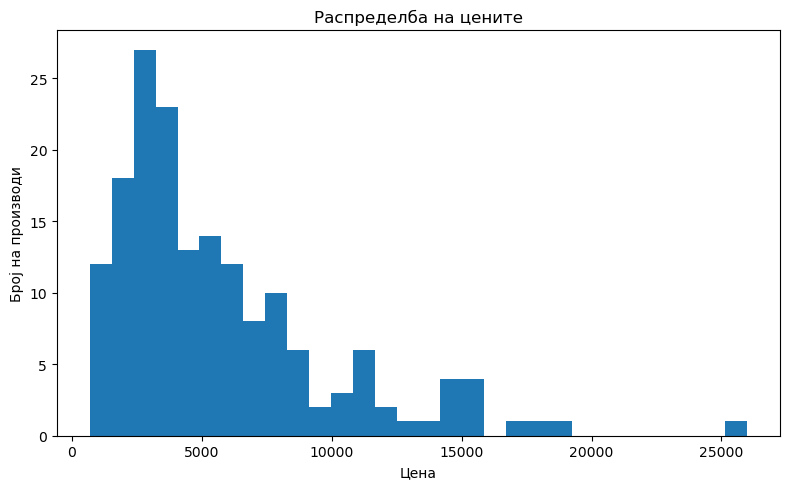

In [94]:
# A. Хистограм на Цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Цена'].dropna(), bins=30)
plt.title('Распределба на цените')
plt.xlabel('Цена')
plt.ylabel('Број на производи')
show()

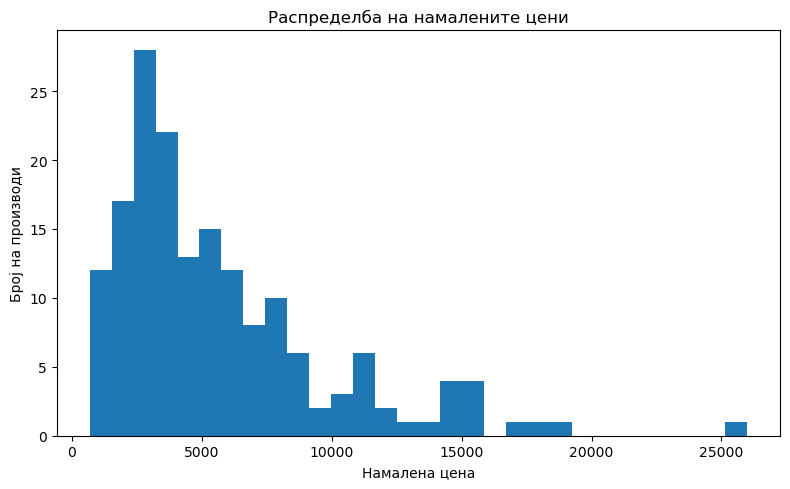

In [95]:
# B. Хистограм на Намалена цена
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['Намалена цена'].dropna(), bins=30)
plt.title('Распределба на намалените цени')
plt.xlabel('Намалена цена')
plt.ylabel('Број на производи')
show()

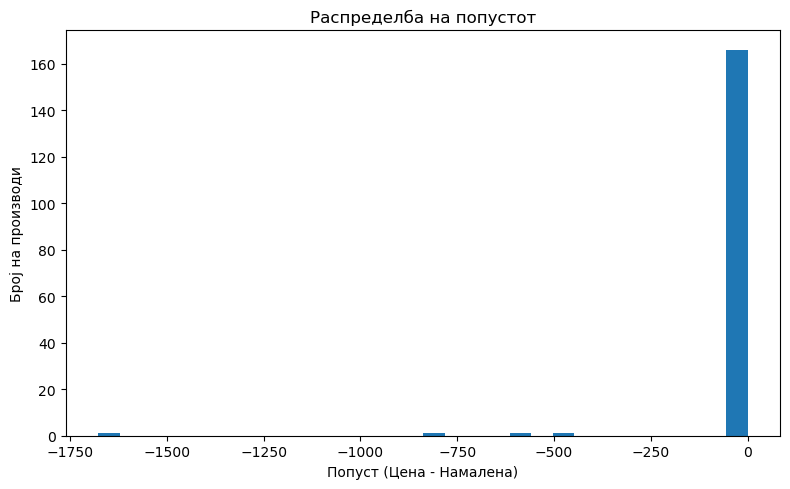

In [96]:
# C. Хистограм на Апсолутен попуст
plt.figure(figsize=(8,5))
plt.hist(cleaned_data['discount_abs'].dropna(), bins=30)
plt.title('Распределба на попустот')
plt.xlabel('Попуст (Цена - Намалена)')
plt.ylabel('Број на производи')
show()

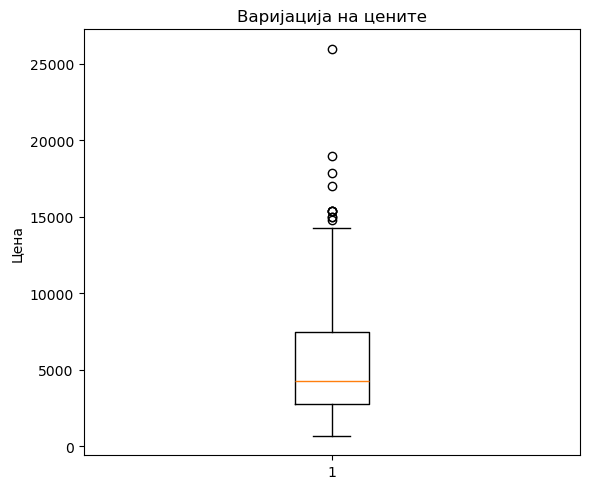

In [97]:
# D. Бокс-плот на Цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Цена'].dropna(), vert=True)
plt.title('Варијација на цените')
plt.ylabel('Цена')
show()

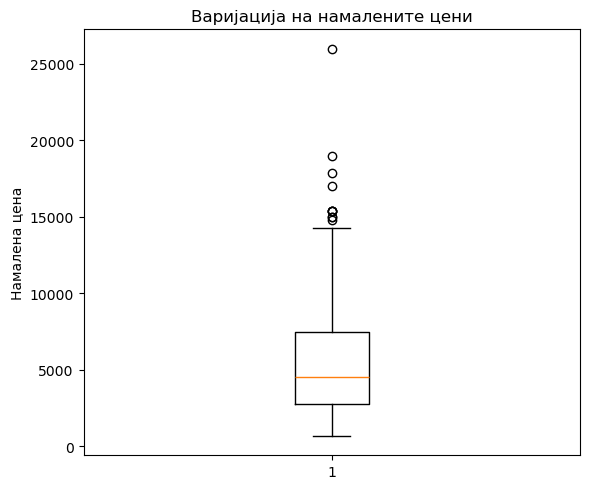

In [98]:
# E. Бокс-плот на Намалена цена
plt.figure(figsize=(6,5))
plt.boxplot(cleaned_data['Намалена цена'].dropna(), vert=True)
plt.title('Варијација на намалените цени')
plt.ylabel('Намалена цена')
show()

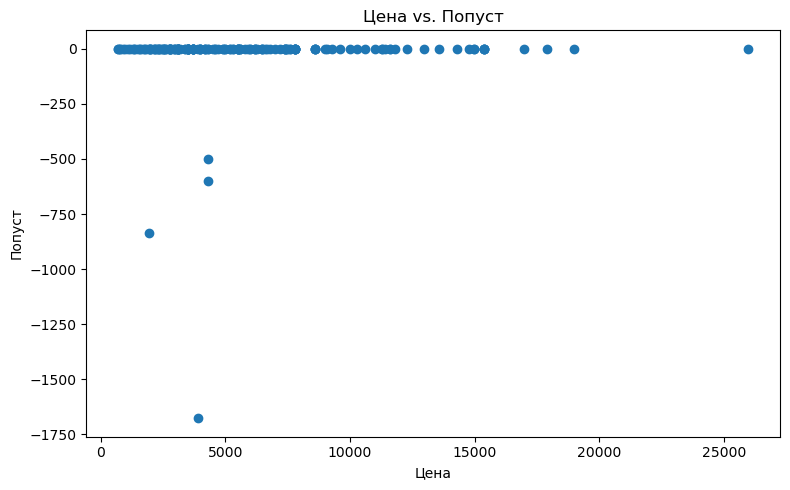

In [99]:
# F. Скатер: Цена vs. Попуст
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['Цена'], cleaned_data['discount_abs'])
plt.title('Цена vs. Попуст')
plt.xlabel('Цена')
plt.ylabel('Попуст')
show()

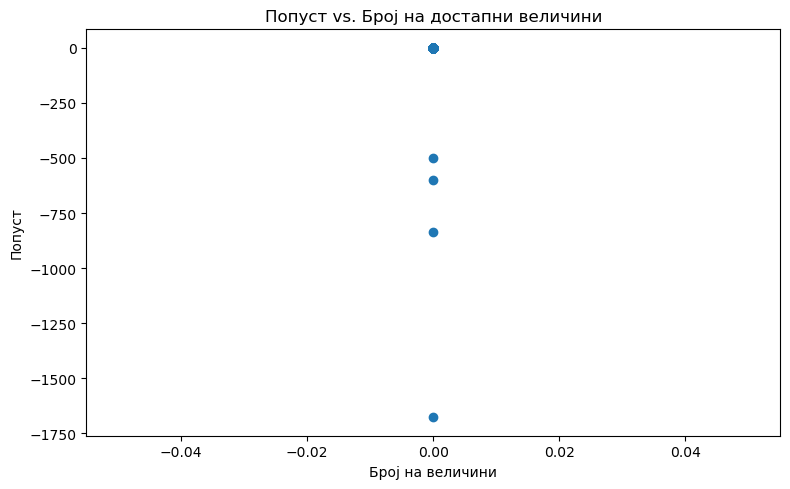

In [100]:
# G. Скатер: Попуст vs. број величини
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_sizes'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Попуст')
show()

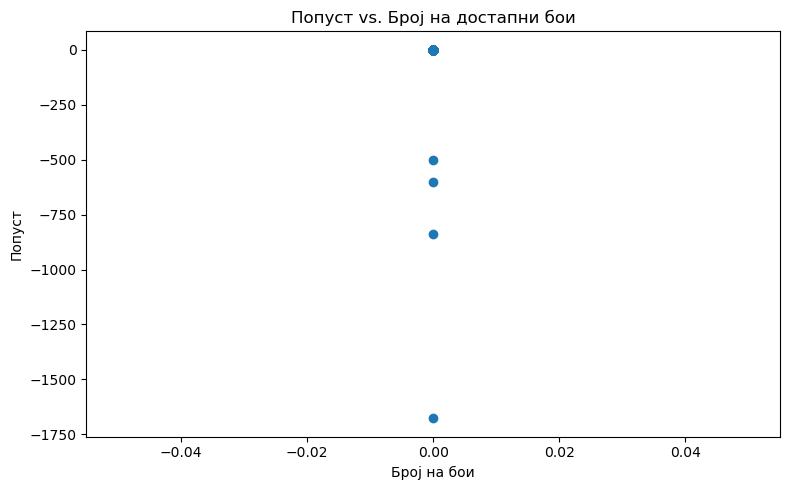

In [101]:
# H. Скатер: Попуст vs. број бои
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['count_colors'], cleaned_data['discount_abs'])
plt.title('Попуст vs. Број на достапни бои')
plt.xlabel('Број на бои')
plt.ylabel('Попуст')
show()